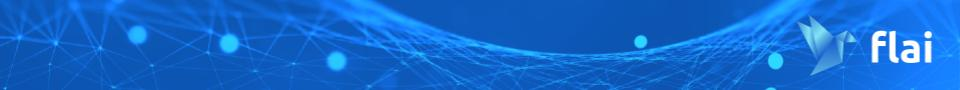

# **Aula 3 - K-Vizinhos Mais Próximos**

## **Importação dos Dados de Custos Médicos**

In [46]:
import pandas as pd
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
dados = pd.read_csv(url)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
# mise en place

dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


---

## **Upgrade na Técnica de Validação: _Holdout Repetido_**

Faça repetições da técnica Holdout, variando a distribuição de quem vai para amostra de teste e treinamento. Guarde os resultados do EQM para cada repetição e, no final, calcule sua média para obter uma valor mais estável para o EQM.

In [48]:
from sklearn.linear_model import LinearRegression #modelo
from sklearn.metrics import mean_squared_error #métrica
from sklearn.model_selection import train_test_split #validação

import numpy as np

R = 1000
eqms = [] 

X = dados[['bmi', 'smoker']]
y = dados['charges'] 

for i in range(R):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
    reg = LinearRegression()
    reg.fit(Xtreino, ytreino)
    preditos = reg.predict(Xteste)
    eqm = mean_squared_error(yteste, preditos) 
    eqms.append(eqm) 
    
print(np.mean(eqms)) 

50.471657996433905


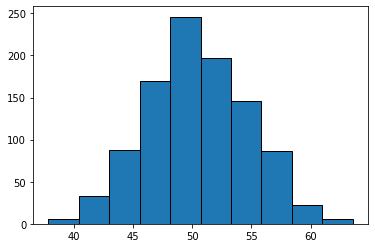

In [49]:
import matplotlib.pyplot as plt

plt.hist(eqms, edgecolor = 'black')
plt.show()

---

## **Modelo: K-Vizinhos Mais Próximos (KNN)**

In [52]:
from sklearn.neighbors import KNeighborsRegressor

k = 37

R = 100

eqms_treino = []
eqms_teste = []

X = dados[['bmi']]
y = dados['charges'] 

for i in range(R):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(Xtreino, ytreino) 

    preditos_treino = knn.predict(Xtreino)
    eqm_treino = mean_squared_error(preditos_treino, ytreino)
    eqms_treino.append(eqm_treino)

    preditos_teste = knn.predict(Xteste)
    eqm_teste = mean_squared_error(preditos_teste, yteste)
    eqms_teste.append(eqm_teste)
 
print('O EQM de TREINO foi: {:.2f}'.format(np.mean(eqms_treino)))
print('O EQM de TESTE  foi:  {:.2f}'.format(np.mean(eqms_teste)))

O EQM de TREINO foi: 136.02
O EQM de TESTE  foi:  143.64


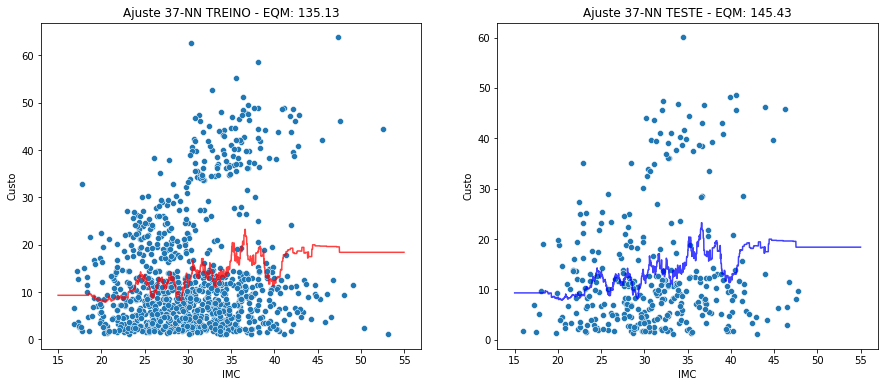

In [53]:
# Gráfico do KNN com 1 Variável 

import matplotlib.pyplot as plt
import seaborn as sns

X = dados[['bmi']]
y = dados['charges']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

knn = KNeighborsRegressor(n_neighbors = k)
knn.fit(Xtreino, ytreino)

preditos_treino = knn.predict(Xtreino)
preditos_teste = knn.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 

x = np.arange(15, 55, 0.01)
y = knn.predict(pd.DataFrame({'bmi': x}))

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino['bmi'], y = ytreino)
plt.plot(x, y, color = 'red', alpha = 0.75)
plt.title('Ajuste {}-NN TREINO - EQM: '.format(k) + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste['bmi'], y = yteste)
plt.plot(x, y, color = 'blue', alpha = 0.75)
plt.title('Ajuste {}-NN TESTE - EQM: '.format(k) + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 
plt.show()

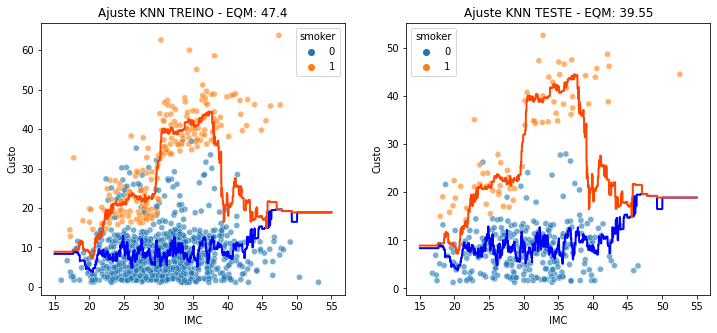

In [59]:
# Gráfico do Modelo com 2 Variáveis

X = dados[['bmi', 'smoker']]
y = dados['charges'] 

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

k = 15

modelo = KNeighborsRegressor(n_neighbors = k)
modelo.fit(Xtreino, ytreino)

preditos_treino = modelo.predict(Xtreino)
preditos_teste = modelo.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 

import numpy as np
 
x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = modelo.predict(c0)
d1 = modelo.predict(c1)

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1) 
sns.scatterplot(x = Xtreino['bmi'], y = ytreino, hue =  Xtreino['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste KNN TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2) 
sns.scatterplot(x = Xteste['bmi'], y = yteste, hue =  Xteste['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2) 
plt.title('Ajuste KNN TESTE - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 

plt.show()

In [55]:
Xtreino.shape

(1003, 2)

---

## **Comparação dos Modelos**

In [60]:
def HoldoutRepetido(modelo, replicas = 100, proporcao = 0.25): 

    eqms_treino = []
    eqms_teste = []

    for i in range(replicas):
        Xtreino , Xteste, ytreino, yteste  = train_test_split(X, y, test_size = proporcao)
        
        #Treinando o Modelo
        reg = modelo
        reg.fit(Xtreino, ytreino)

        #Verificando o eqm no teste
        preditos_treino = reg.predict(Xtreino) 
        eqm_treino = mean_squared_error(ytreino, preditos_treino)

        preditos_teste = reg.predict(Xteste)
        eqm_teste = mean_squared_error(yteste, preditos_teste)

        #Guardando o resultado
        eqms_treino.append(eqm_treino)
        eqms_teste.append(eqm_teste)
    
    res_treino = np.array(eqms_treino).mean().round(2)
    res_teste = np.array(eqms_teste).mean().round(2)

    print('EQM médio de TREINO: {}'.format(res_treino))
    print('EQM médio de TESTE: {}\n'.format(res_teste))

    return res_treino, res_teste 

In [61]:
HoldoutRepetido(modelo = KNeighborsRegressor())

EQM médio de TREINO: 31.41
EQM médio de TESTE: 46.92



(31.41, 46.92)

In [62]:
HoldoutRepetido(KNeighborsRegressor(n_neighbors = 20))

EQM médio de TREINO: 48.36
EQM médio de TESTE: 55.7



(48.36, 55.7)

In [63]:
X = dados[['bmi', 'smoker']]
y = dados['charges']

modelos = [LinearRegression(), 
           KNeighborsRegressor(n_neighbors = 5), 
           KNeighborsRegressor(n_neighbors = 15),
           KNeighborsRegressor(n_neighbors = 25),
           KNeighborsRegressor(n_neighbors = 35),
           KNeighborsRegressor(n_neighbors = 45)]

nomes = ['Regressão Linear',
         'KNN - K = 5', 
         'KNN - K = 15', 
         'KNN - K = 25', 
         'KNN - K = 35', 
         'KNN - K = 45']

treinos = []
testes = []

for modelo in modelos:
    resultados = HoldoutRepetido(modelo)
    treinos.append(resultados[0])
    testes.append(resultados[1])

aux = {'EQM Treino': treinos, 'EQM Teste': testes}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = 'EQM Teste')

EQM médio de TREINO: 50.04
EQM médio de TESTE: 50.55

EQM médio de TREINO: 31.38
EQM médio de TESTE: 47.51

EQM médio de TREINO: 43.9
EQM médio de TESTE: 50.92

EQM médio de TREINO: 54.05
EQM médio de TESTE: 60.34

EQM médio de TREINO: 67.69
EQM médio de TESTE: 72.36

EQM médio de TREINO: 80.64
EQM médio de TESTE: 85.55



,EQM Treino,EQM Teste
KNN - K = 5,31.38,47.51
Regressão Linear,50.04,50.55
KNN - K = 15,43.90,50.92
KNN - K = 25,54.05,60.34
KNN - K = 35,67.69,72.36
KNN - K = 45,80.64,85.55


---

# **Exercício Proposto**

# Encontre o melhor valor possível para o K do KNN. Comente sobre variabilidade estatística envolvida nesse problema. 

---

**_#itstimetoflai_** 